# Analysing a customer information dataset. 
This exercise goes through the creation of a basic pipeline from the basic data processing steps through to an analysis of customers of potential churn, with the goal to understand the unique features of each customer indicated as ready to churn.

License: CCO: Public Domain

### Installing Dependencies

In [208]:
!pip install chart_studio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [210]:
import chart_studio.plotly as py
import plotly.offline as pyoff
import plotly.graph_objs as go

## Accessing data

In [211]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [212]:
"""
Use this cell to mount your google drive to the colab notebook, for easier access to the data
"""

'\nUse this cell to mount your google drive to the colab notebook, for easier access to the data\n'

In [213]:
data = pd.read_csv("/content/drive/MyDrive/Colab Data/Bank Customer Churn Prediction.csv")

## Exploratory analysis and data processing
First, let's view the basic data structure

### Exploratory data analysis

In [214]:
columns = data.applymap(np.isreal).all()
catCount = columns.value_counts()[0]
numCount = columns.value_counts()[1]

print("Data has {cc} categorical columns, {nc} numeric columns".format(cc=catCount, nc=numCount))

Data has 2 categorical columns, 10 numeric columns


In [215]:
data.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

Analysis shows the data has two categorical columns and 9 numeric columns. Only closer inspection customer_id should be categorical. This will not be a feature, rather an identifier. Let's create a dataframe with only the features.

There are no missing entries in our dataset.

In [216]:
ids = data[["customer_id"]] # useful to keep customer id's
df = data.copy()
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [217]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Churn rate for each major group

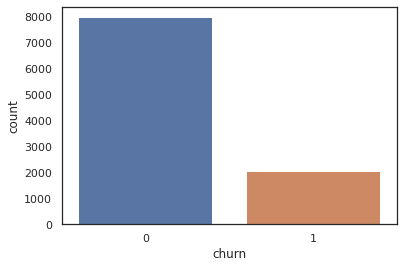

In [218]:
sns.countplot(x='churn', data=df)

In [219]:
df.groupby('gender').churn.mean()

gender
Female    0.250715
Male      0.164559
Name: churn, dtype: float64

In [220]:
df_plot = df.groupby('gender').churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['gender'],
        y=df_plot['churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [221]:
df_plot = df.groupby('age').churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['age'],
        y=df_plot['churn'],
        width = [0.5, 0.5],
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='age',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [222]:
df_plot = df.groupby('credit_score').churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['credit_score'],
        y=df_plot['churn'],
        width = [0.5, 0.5],
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='credit_score',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

In [223]:
df_plot = df.groupby('country').churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['country'],
        y=df_plot['churn'],
        width = [0.5, 0.5],
    )
]
plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='country',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()

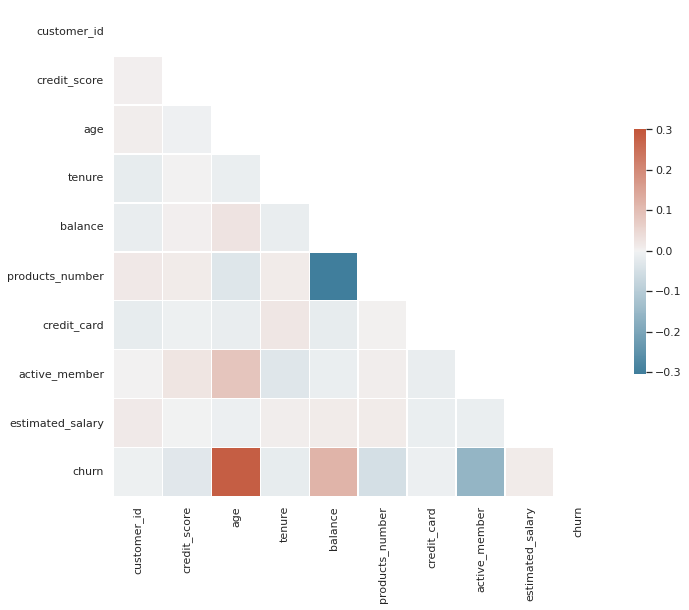

In [224]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Some additional features may be required. 

The focus of this analysis is targetted promotions for customers likely to churn. Let's look at the ratio between expected salary and current balance.

In [225]:
df['utilization_ratio'] = df['balance'] / df['estimated_salary']
df["utilization_ratio"] = df["utilization_ratio"].fillna(np.mean(df["utilization_ratio"]))

In [226]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,utilization_ratio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055


Let's encode the categorical variables using one-hot encoding.

In [227]:
df_cat = df.select_dtypes(include='object')
df_cat = pd.get_dummies(df_cat)

df_num = df.select_dtypes(exclude='object')

# combine scaled numerical and categorical dummy variables in a dataframe
df = pd.concat([df_num, df_cat], axis=1)
df.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,utilization_ratio,country_France,country_Germany,country_Spain,gender_Female,gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0.000000,1,0,0,1,0
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0.744677,0,0,1,1,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,1,0,0,1,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0.000000,1,0,0,1,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,1.587055,0,0,1,1,0


## XGBoost Model

XGBoost is a common model for binary predictions with relatively low cardinality feature sets. The XGBoost model is known for high accuracy and provides a quick win with minimal feature/paramter engineering

In [229]:
#create feature set and labels
X = df.drop(['churn','customer_id'],axis=1)
y = df.churn

In [230]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=56)

In [231]:
#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.89
Accuracy of XGB classifier on test set: 0.86


Let's predict on the test set

In [232]:
y_pred = xgb_model.predict(X_test)

In [233]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       785
           1       0.79      0.47      0.59       215

    accuracy                           0.86      1000
   macro avg       0.83      0.72      0.75      1000
weighted avg       0.85      0.86      0.84      1000



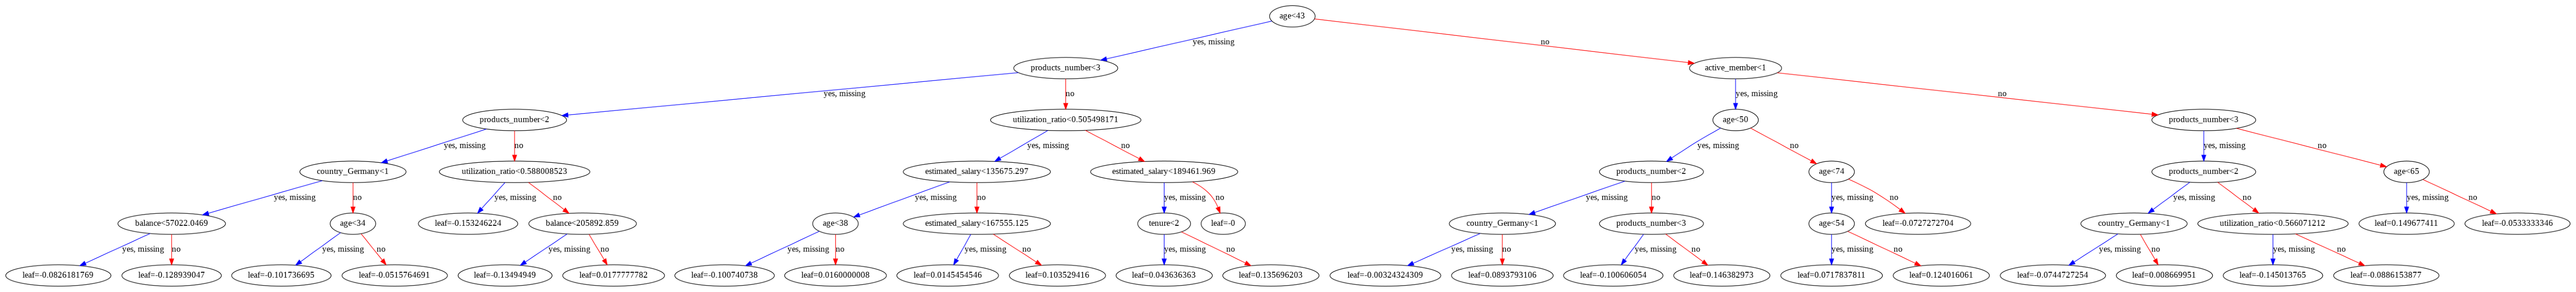

In [234]:
from xgboost import plot_tree

##set up the parameters
fig, ax = plt.subplots(figsize=(100,100))
plot_tree(xgb_model, ax=ax)

We want to understand feature importance in this exercise, as this can help the client understand what features drive potential customer churn or are indicative or customer churn rate being high. 

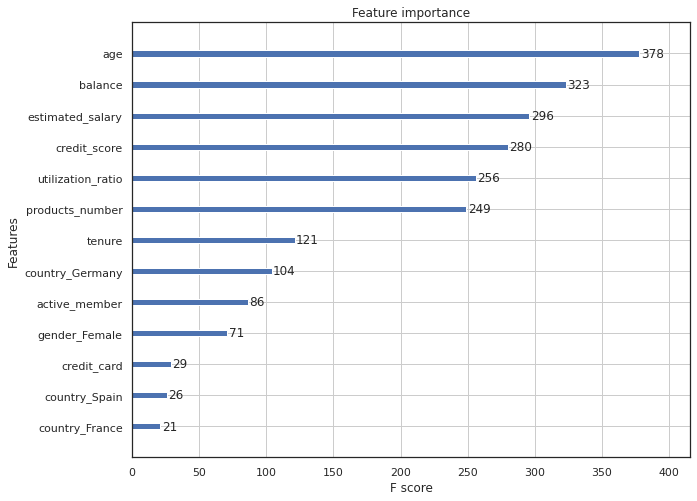

In [235]:
from xgboost import plot_importance
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [236]:
df['probabilityChurn'] = xgb_model.predict_proba(df[X_train.columns])[:,1]

In [238]:
df[['customer_id', 'probabilityChurn']].head()

,customer_id,probabilityChurn
0,15634602,0.323888
1,15647311,0.124898
2,15619304,0.974647
3,15701354,0.065961
4,15737888,0.089739


In [240]:
df.loc[df["probabilityChurn"] > 0.8]

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,utilization_ratio,country_France,country_Germany,country_Spain,gender_Female,gender_Male,probabilityChurn
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1.401375,1,0,0,1,0,0.974647
7,15656148,376,29,4,115046.74,4,1,0,119346.88,1,0.963969,0,1,0,1,0,0.982870
16,15737452,653,58,1,132602.88,1,1,0,5097.67,1,26.012449,0,1,0,0,1,0.948760
41,15738148,465,51,8,122522.32,1,0,0,181297.65,1,0.675808,1,0,0,1,0,0.808341
70,15703793,738,58,2,133745.44,4,1,0,28373.86,1,4.713685,0,1,0,0,1,0.990337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9819,15813946,637,51,1,104682.83,1,1,0,55266.96,1,1.894130,0,1,0,0,1,0.841923
9877,15572182,505,33,3,106506.77,3,1,0,45445.78,1,2.343601,0,1,0,1,0,0.923511
9879,15669414,486,62,9,118356.89,2,1,0,168034.83,1,0.704359,0,1,0,0,1,0.851347
9895,15796764,684,56,3,127585.98,3,1,1,80593.49,1,1.583080,0,1,0,1,0,0.987831
